In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as ani
import bar_chart_race as bcr
import os
import subprocess
%matplotlib tk

In [33]:
df_bs4=pd.read_csv("./bin/Results_bs4.csv")
df_bs3=pd.read_csv("./bin/Results_bs3.csv")
df_bs2=pd.read_csv("./bin/Results_bs2.csv")
df_bs1=pd.read_csv("./bin/Results_bs1.csv")
df_bsh=pd.read_csv("./bin/Results_bsh.csv")
df_bs4_r=pd.read_csv("./bin/Results_bs4_r.csv")
df_bs3_r=pd.read_csv("./bin/Results_bs3_r.csv")
df_bs2_r=pd.read_csv("./bin/Results_bs2_r.csv")
df_bs1_r=pd.read_csv("./bin/Results_bs1_r.csv")
df_bsh_r=pd.read_csv("./bin/Results_bsh_r.csv")
df_monoclinic=pd.read_csv("./bin/Results_monoclinic.csv")
df_tetragonal=pd.read_csv("./bin/Results_tetragonal.csv")
#df_temp=pd.read_csv("./bin/Results.csv")
df=df_bs4_r

In [21]:
conf_number=df['Conf'].iloc[-1]+1
no_of_ION=df['ION'].sum()/conf_number
no_of_CION=no_of_ION
print(no_of_ION)

1664.0


In [22]:
df['Charge']=df['CION']-df['ION']
df['CION/ION']=df['CION']/df['ION']
df['SOL/ION']=df['SOL']/df['ION']
max_cluster_size=df['ION'].max()


In [23]:
df

,Conf,CNo.,ION,CION,SOL,R3,R4,R5,R6,R7,R8,R9,Charge,CION/ION,SOL/ION
0,0,0,1337,0,0,0,16,12,4,0,0,0,-1337,0.0,0.0
1,0,1,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
2,0,2,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
3,0,3,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
4,0,4,3,0,0,0,0,0,0,0,0,0,-3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42170,200,207,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
42171,200,208,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
42172,200,209,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0
42173,200,210,1,0,0,0,0,0,0,0,0,0,-1,0.0,0.0


In [24]:
#df=df[df['ION']>200]
#df
print(df.mean())

Conf        100.853254
CNo.        104.708880
ION           7.930385
CION          0.000000
SOL           0.000000
R3            0.000000
R4            0.058945
R5            0.024541
R6            0.017261
R7            0.010717
R8            0.009555
R9            0.000000
Charge       -7.930385
CION/ION      0.000000
SOL/ION       0.000000
dtype: float64


In [8]:
df[df['ION']>1000]

,Conf,CNo.,ION,CION,SOL,Charge,CION/ION,SOL/ION
0,0,0,1337,1135,4461,-202,0.848915,3.336574
214,1,0,1330,1142,4416,-188,0.858647,3.320301
433,2,0,1335,1142,4362,-193,0.855431,3.267416
645,3,0,1357,1171,4489,-186,0.862933,3.308032
852,4,0,1322,1142,4322,-180,0.863843,3.269289
...,...,...,...,...,...,...,...,...
41075,196,0,1281,1086,4266,-195,0.847775,3.330211
41296,197,0,1339,1111,4557,-228,0.829724,3.403286
41521,198,0,1351,1126,4577,-225,0.833457,3.387861
41735,199,0,1311,1118,4450,-193,0.852784,3.394355


In [10]:
df[df['ION']>1000].mean()

Conf         100.000000
CNo.           0.144279
ION         1314.263682
CION        1113.383085
SOL         4359.124378
Charge      -200.880597
CION/ION       0.847234
SOL/ION        3.316560
dtype: float64

In [36]:
(df.ION.unique())

array([1337,    1,    3,   18,    5,    6,    4,    2,    8, 1330,    7,
       1335,    9,   16, 1357, 1322,   14, 1278,   29,   10,   13, 1295,
         15, 1319,   11,   26, 1336,   12, 1351, 1315, 1365, 1314, 1352,
       1331, 1328, 1355, 1329, 1350, 1343, 1300, 1318, 1325,   32, 1369,
       1356, 1340, 1361, 1347, 1317, 1327, 1326, 1288,   31, 1310, 1307,
       1360, 1279, 1353, 1324, 1338,   22, 1341, 1333, 1334, 1382, 1316,
       1266, 1250,   21, 1309, 1294, 1293, 1301, 1306, 1349, 1378, 1342,
       1320, 1304, 1296, 1271,   24, 1321, 1273, 1289, 1287, 1277,   17,
       1313, 1312,   20,   19, 1264, 1339, 1332,   27, 1276, 1290, 1323,
       1298, 1280, 1267, 1311, 1257, 1268, 1292, 1302, 1281,   25, 1305,
       1282, 1291, 1259,   40, 1253, 1299,   23, 1303, 1262, 1297, 1283,
       1256,   28, 1270, 1240, 1248])

In [25]:
df.groupby('Conf').sum().mean()

CNo.        21970.631841
ION          1664.000000
CION            0.000000
SOL             0.000000
R3              0.000000
R4             12.368159
R5              5.149254
R6              3.621891
R7              2.248756
R8              2.004975
R9              0.000000
Charge      -1664.000000
CION/ION        0.000000
SOL/ION         0.000000
dtype: float64

Cluster Size->Avg:8 Max:1382
Trivial%: 23.84 Small%: 3.45 Medium%: 1.78 Large%: 70.94 


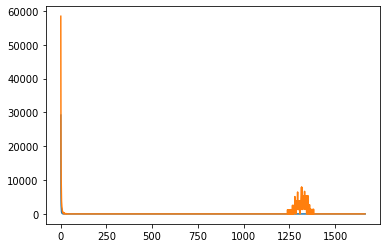

In [35]:
freq=df['ION'].value_counts(sort=True)
cluster_size_freq=np.zeros(int(no_of_ION)+1)
#freq.columns=['ION_Size','Count']
for i in list(freq.index):
    cluster_size_freq[i]=int(freq.loc[i])
cluster_size_freq=pd.Series(cluster_size_freq)
cluster_size_freq = cluster_size_freq.iloc[1:]
cluster_count_freq=cluster_size_freq*pd.Series(cluster_size_freq.index)
print("Cluster Size->Avg:{} Max:{}".format(round(df['ION'].mean()),df['ION'].max()))
#print("Count->Avg:{} Max:{}".format(cluster_count_freq.mean(),cluster_count_freq.idxmax()))

trivial=cluster_count_freq[0:4].sum()
small=cluster_count_freq[4:7].sum()
medium=cluster_count_freq[7:13].sum()
large=cluster_count_freq[13:].sum()
trivial_percent=round(trivial/cluster_count_freq.sum()*100,2);
small_percent=round(small/cluster_count_freq.sum()*100,2);
medium_percent=round(medium/cluster_count_freq.sum()*100,2);
large_percent=round(large/cluster_count_freq.sum()*100,2);

#print("Trivial: {} Small: {} Medium: {} Large: {} ".format(trivial,small,medium,large))
print("Trivial%: {} Small%: {} Medium%: {} Large%: {} ".format(trivial_percent,small_percent,medium_percent,large_percent))

plt.plot(cluster_size_freq.index,cluster_size_freq)
plt.plot(cluster_count_freq.index,cluster_count_freq)
#plt.xlim(,1664)

In [9]:
df_large=df[df['ION']>=6]

In [10]:
df_large

,Conf,CNo.,ION,CION,SOL,CION/ION,SOL/ION,Charge
0,0,0,1337,1135,4461,0.848915,3.336574,-202
5,0,5,18,14,70,0.777778,3.888889,-4
9,0,9,6,2,38,0.333333,6.333333,-4
10,0,10,6,5,32,0.833333,5.333333,-1
29,0,29,8,4,41,0.500000,5.125000,-4
...,...,...,...,...,...,...,...,...
41988,200,25,9,7,45,0.777778,5.000000,-2
42002,200,39,9,5,51,0.555556,5.666667,-4
42018,200,55,6,3,28,0.500000,4.666667,-3
42077,200,114,6,5,34,0.833333,5.666667,-1


In [32]:
df_large=df_large.drop(['Conf','CNo.'],axis=1)

In [34]:
df_large.describe()

,ION,CION,SOL,CION/ION,SOL/ION
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,190.013122,158.793508,218.977901,0.586490,1.640363
std,451.651702,383.489133,735.351356,0.230075,1.644785
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,6.000000,0.428571,0.585957
50%,8.000000,5.000000,9.000000,0.577935,0.916667
75%,12.000000,8.000000,35.000000,0.818182,1.571429
max,1382.000000,1171.000000,4550.000000,1.285714,7.500000


In [37]:
(df.drop(['Conf','CNo.'],axis=1)).describe()

,ION,CION,SOL,CION/ION,SOL/ION
count,42175.000000,42175.000000,42175.000000,42175.000000,42175.000000
mean,7.930385,5.968322,15.455602,0.350590,6.210856
std,90.434681,76.660560,269.971367,0.507198,194.961404
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.500000
50%,1.000000,0.000000,2.000000,0.000000,1.000000
75%,2.000000,1.000000,4.000000,0.714286,3.000000
max,1382.000000,1171.000000,11329.000000,4.000000,10903.000000


In [41]:
df.sort_values(by=['SOL/ION'],ascending=False)

,Conf,CNo.,ION,CION,SOL,CION/ION,SOL/ION
28080,135,20,1,0,10903,0.0,10903.0
29466,141,27,1,0,10900,0.0,10900.0
5150,24,186,1,0,10869,0.0,10869.0
6379,30,176,1,0,10866,0.0,10866.0
19937,96,110,1,1,10860,1.0,10860.0
...,...,...,...,...,...,...,...
15791,76,122,2,1,0,0.5,0.0
15790,76,121,1,0,0,0.0,0.0
31340,149,186,1,0,0,0.0,0.0
31345,149,191,1,0,0,0.0,0.0


In [43]:
df[df['Conf']==29]

,Conf,CNo.,ION,CION,SOL,CION/ION,SOL/ION
6001,29,0,1356,1166,785,0.859882,0.578909
6002,29,1,2,0,2,0.000000,1.000000
6003,29,2,3,1,7,0.333333,2.333333
6004,29,3,1,0,2,0.000000,2.000000
6005,29,4,1,0,1,0.000000,1.000000
...,...,...,...,...,...,...,...
6198,29,197,1,2,0,2.000000,0.000000
6199,29,198,1,0,1,0.000000,1.000000
6200,29,199,1,1,0,1.000000,0.000000
6201,29,200,1,0,1,0.000000,1.000000


In [44]:
df['SOL'].sum()/conf_number

3242.9850746268658

# Analysing SOL population

In [92]:
model_names=['bsh','bs1','bs2','bs3','bs4']

In [96]:
SOL_data=[]
for name in model_names:
    SOL_data.append(pd.read_csv("./bin/SOLstats_"+name+".dat"))
df_SOL=dict(zip(model_names,SOL_data))


SOL_mean=[]
for df in SOL_data:
    SOL_mean.append(df.mean())
SOL_percent=[]
for df in SOL_mean:
    SOL_percent.append(df/df.sum()*100)
df_SOL_res=pd.DataFrame(SOL_percent)
df_SOL_res.index=model_names
df_SOL_res=df_SOL_res[df_SOL_res.columns[df_SOL_res.sum(axis=0)>0]]
df_SOL_res

,S0,S1,S2,S3,S4,S5,S6
bsh,86.228427,12.765116,0.979274,0.026877,0.000305,0.000000,0.000000
bs1,76.121029,20.630203,3.053564,0.189311,0.005894,0.000000,0.000000
bs2,67.377624,24.229902,7.281912,1.030591,0.076263,0.003658,0.000051
bs3,60.110789,26.400702,11.354532,1.954992,0.171210,0.007736,0.000038
bs4,50.584585,30.811781,15.533355,2.798965,0.260607,0.010708,0.000000


In [97]:
df_SOL_res.plot(kind='bar', stacked=True, title="Percentage of SOL molecules having x connections")

<AxesSubplot:title={'center':'Percentage of SOL molecules having x connections'}>

In [33]:
number_of_SOL=df_SOL.iloc[0].sum()
print(number_of_SOL)

9792


In [34]:
(df_SOL/number_of_SOL*100).mean()

S0      67.377624
 S1     24.229902
 S2      7.281912
 S3      1.030591
 S4      0.076263
 S5      0.003658
 S6      0.000051
 S7      0.000000
 S8      0.000000
 S9      0.000000
 S10     0.000000
 S11     0.000000
 S12     0.000000
 S13     0.000000
 S14     0.000000
dtype: float64

In [54]:
df_res=pd.DataFrame((df_SOL_bsh/df_SOL_bsh.iloc[0].sum()*100).mean())
df_res[1]=(df_SOL_bs1/df_SOL_bs1.iloc[0].sum()*100).mean()
df_res[2]=(df_SOL_bs2/df_SOL_bs2.iloc[0].sum()*100).mean()
df_res[3]=(df_SOL_bs3/df_SOL_bs3.iloc[0].sum()*100).mean()
df_res[4]=(df_SOL_bs4/df_SOL_bs4.iloc[0].sum()*100).mean()


In [55]:
df_res

,0,1,2,3,4
S0,86.228427,76.121029,67.377624,60.110789,50.584585
S1,12.765116,20.630203,24.229902,26.400702,30.811781
S2,0.979274,3.053564,7.281912,11.354532,15.533355
S3,0.026877,0.189311,1.030591,1.954992,2.798965
S4,0.000305,0.005894,0.076263,0.171210,0.260607
S5,0.000000,0.000000,0.003658,0.007736,0.010708
S6,0.000000,0.000000,0.000051,0.000038,0.000000
S7,0.000000,0.000000,0.000000,0.000000,0.000000
S8,0.000000,0.000000,0.000000,0.000000,0.000000
S9,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
df_ress=pd.DataFrame()

In [57]:
df_ress['bsh']=(df_SOL_bsh/df_SOL_bsh.iloc[0].sum()*100).mean()

,bsh
S0,86.228427
S1,12.765116
S2,0.979274
S3,0.026877
S4,0.000305
S5,0.000000
S6,0.000000
S7,0.000000
S8,0.000000
S9,0.000000
